In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import numpy as np


In [123]:
# Load up the file and put it into a dataFrame
path=str('D:\\DataSets\\Corona\\covid_de.csv')
#pop=str('D:\\DataSets\\Corona\\Population1.xlsx')


path=path.replace('\\','/')
#pop=pop.replace('\\','/')

df=pd.read_csv(path)
#df_pop=pd.read_csv(filepath_or_buffer=pop,sep=',',encoding='cp1252')
#df_pop=pd.read_excel(io=pop)

pd.set_option("display.max.rows",None)


In [124]:
#explore the df

In [125]:
#print(df.describe())
#print('--next--')
#print(df.info())

In [126]:
#Columns
#print(df.columns)
df['date']=pd.to_datetime(df['date'])
#df['date'].values=df.sort_values(by=df['date'],ascending=True,axis=1)
#print(df.info())
#print(df)

In [127]:
print(max(df['date']))

2021-02-01 00:00:00


In [128]:
quantitative=[i for i in df.columns if df[i].dtype !='object']
qualitative=[i for i in df.columns if df[i].dtype =='object']

In [129]:
print(quantitative)

['date', 'cases', 'deaths', 'recovered']


In [130]:
print(qualitative)

['state', 'county', 'age_group', 'gender']


In [131]:
# Handling missing value in quantitative
df.isna().any()

state        False
county       False
age_group     True
gender        True
date         False
cases        False
deaths       False
recovered    False
dtype: bool

In [132]:
for i in qualitative:
    df[i]=df[i].astype('category')
    if df[i].isnull().any():
        df[i]=df[i].cat.add_categories(['MISSING'])
        df[i]=df[i].fillna('MISSING')
        

In [133]:
df.isna().any()

state        False
county       False
age_group    False
gender       False
date         False
cases        False
deaths       False
recovered    False
dtype: bool

In [134]:
# All Cases

Text(0.5, 1.0, 'Deaths per day')

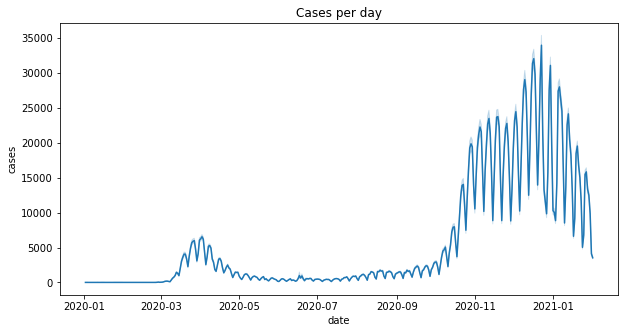

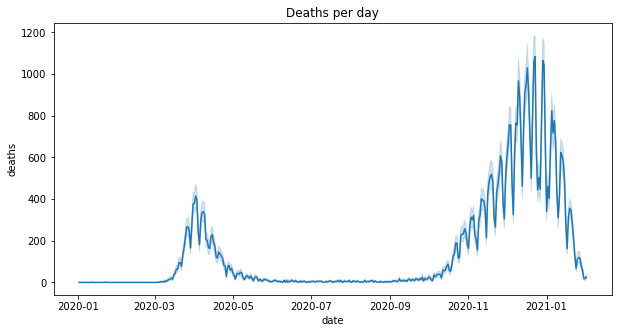

In [135]:
plt.figure(1,figsize=(10,5))
sns.lineplot(data=df,x='date',y='cases',estimator=sum)
plt.title('Cases per day')

plt.figure(2,figsize=(10,5))
sns.lineplot(data=df,x='date',y='deaths',estimator=sum)
plt.title('Deaths per day')

In [136]:
df=df.sort_values(by=['date'],ascending=True)
df_pivot=df.pivot_table(values=['cases'],index='date',aggfunc=np.sum)
#print(df_pivot)

In [137]:
# All Deaths

In [138]:
#Funktion to call the lineplot
def lineplot_death(DataFrame,title):
    fig,ax=plt.subplots(figsize=(10,5))
    fig=sns.lineplot(data=DataFrame
                     ,x='date'
                     ,y='deaths'
                     ,estimator=sum
                     ,ci=None
                     ,hue='age_group')
    plt.title(title)
    

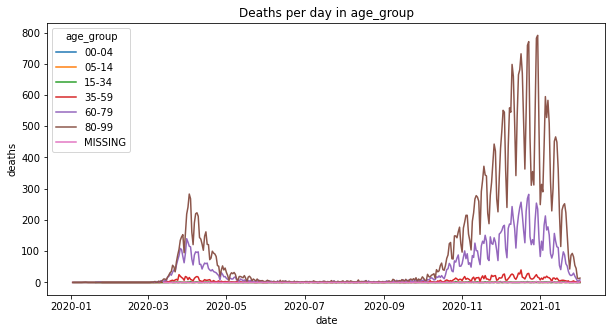

In [139]:
lineplot_death(df,'Deaths per day in age_group')


In [140]:
print(df['deaths'].groupby(df['age_group']).sum())
print('Total: '+str(df['deaths'].sum()))

age_group
00-04          8
05-14          4
15-34         73
35-59       1857
60-79      15444
80-99      40557
MISSING       33
Name: deaths, dtype: int64
Total: 57976


In [141]:
#Gender comparrisson

In [142]:
df_female=df[df['gender']=='F']
print(df_female['gender'].value_counts())

df_male=df[df['gender']=='M']
print(df_male['gender'].value_counts())


F          251781
M               0
MISSING         0
Name: gender, dtype: int64
M          249079
F               0
MISSING         0
Name: gender, dtype: int64


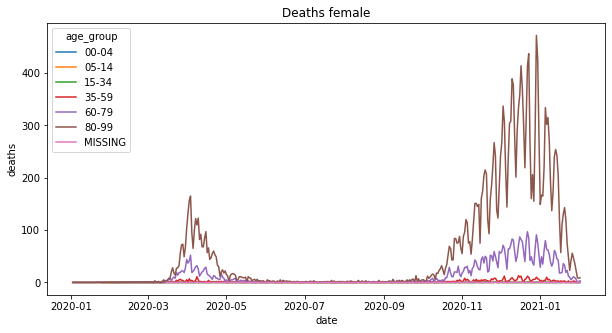

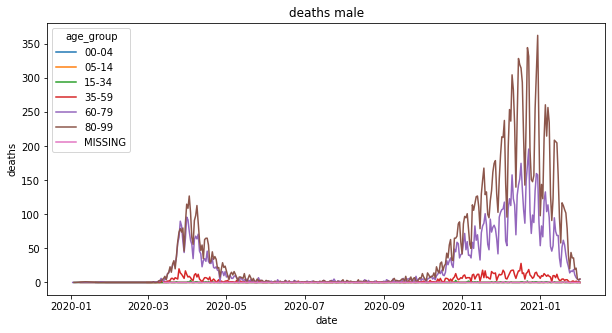

In [143]:
lineplot_death(df_female,'Deaths female')
lineplot_death(df_male,'deaths male')

In [144]:
print(sum(df_female['cases']))
print(sum(df_male['cases']))

1170436
1039738


In [145]:
df_female.agg({'cases':'sum','deaths':'sum'})

cases     1170436
deaths      28119
dtype: int64

In [146]:
df_male.agg({'cases':'sum','deaths':'sum'})

cases     1039738
deaths      29689
dtype: int64

In [147]:
# Are males mor affective  to a critical state due to corona in relativ to the sum of cases at the same gender?
female_cases=df_female['cases'].sum()
female_deaths=df_female['deaths'].sum()
male_cases=df_male['cases'].sum()
male_deaths=df_male['deaths'].sum()

prop={'female':round((female_deaths/female_cases)*100,2),'male':round((male_deaths/male_cases)*100,2)}


In [148]:
print(prop)

{'female': 2.4, 'male': 2.86}


In [149]:
#deaths by age posibility

In [150]:
df_age=df.groupby(by='age_group')[['deaths','cases']].agg(sum)

In [151]:
death_to_case=[]
death_to_case_thousand=[]

for i in df_age.index:
    x=np.around((df_age.loc[i]['deaths']/df_age.loc[i]['cases'])*100,decimals=3)
    y=x*1000
    death_to_case.append(x)
    death_to_case_thousand.append(y)    

In [152]:
df_age['posibility_to_death_%']=death_to_case
df_age['deaths per 100_000']=death_to_case_thousand

print(df_age)

           deaths   cases  posibility_to_death_%  deaths per 100_000
age_group                                                           
00-04           8   39056                  0.020                20.0
05-14           4  123836                  0.003                 3.0
15-34          73  646694                  0.011                11.0
35-59        1857  845194                  0.220               220.0
60-79       15444  341867                  4.518              4518.0
80-99       40557  227300                 17.843             17843.0
MISSING        33    3823                  0.863               863.0


In [153]:
###overview###

In [154]:
df.agg({'cases':sum,'deaths':sum,'recovered':sum})

cases        2227770
deaths         57976
recovered    1953476
dtype: int64

In [155]:
df_group_overview=df.groupby(by='date')[['cases','recovered','deaths']].agg(sum)

In [156]:
#print(df_group_overview.columns)
#print(df_group_overview)

Text(0.5, 1.0, 'Cases vs. Deaths')

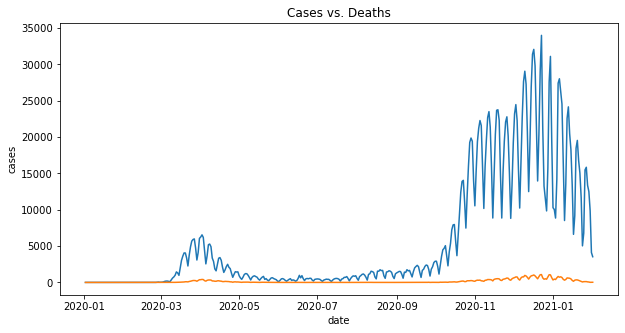

In [157]:
plt.figure(1,figsize=(10,5))
sns.lineplot(data=df_group_overview,x='date',y='cases',estimator=sum)
sns.lineplot(data=df_group_overview,x='date',y='deaths',estimator=sum)
plt.title('Cases vs. Deaths')

<AxesSubplot:ylabel='Frequency'>

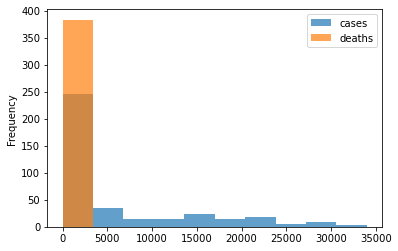

In [158]:
df_group_overview[['cases','deaths']].plot(kind='hist',alpha=.7,sharex=True,sharey=True)

In [159]:
#kumulative view#